<a href="https://colab.research.google.com/github/amnarafique/Django-another/blob/master/02_neural_network_classification_wth_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# introduction to neural network classification with tensorflow


## Creating data to view and fit


In [ ]:
from sklearn.datasets import make_circles
# make circles
n_samples = 1000
# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
#check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

our data is little hard to understand let's visualize it


In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:,0], 'X1':X[:, 1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

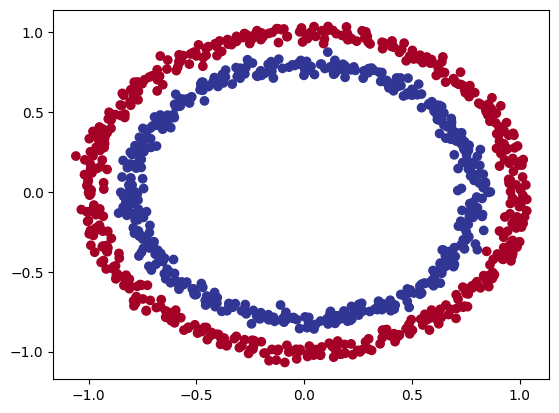

In [ ]:
# visualize it with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## input and output shapes


In [ ]:
# check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# how many samples we are working with
len(X), len(y)

(1000, 1000)

In [ ]:
# view the first example of features and lables
X[5], y[5]

(array([-0.47964637,  0.67643477]), 1)

## Steps in modelling

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Sequential

tf.random.set_seed(42)
model = Sequential([
    layers.Dense(1)
])
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=0)
model.evaluate(X, y)


32/32 [==============================] - 0s 2ms/step - loss: 0.7769 - accuracy: 0.4930


[0.7769392132759094, 0.49300000071525574]

In [ ]:
tf.random.set_seed(42)

model_1 = Sequential([
  layers.Dense(100),
  layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer='Adam',
                metrics=['accuracy'])
model_1.fit(X, y, epochs=100, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.5080


[0.6946443319320679, 0.5080000162124634]

# Improve our model

In [ ]:
tf.random.set_seed(42)

model_2 = Sequential([
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer='Adam',
                metrics='accuracy')
model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.5100


[0.6991232633590698, 0.5099999904632568]

# Making predictions

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decsion boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = y[:, 1].min() - 0.1, y[:,1].max() + 0.1

  # Creating meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))


  # Create X vlaues
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi_class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # we have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plots the decisio boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


In [ ]:
def plot_decision_boundary(model, X, y) :

# definig the axis boundries of the plot and create a mashgrid

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

# creating meshgrid

  xx, yy = np.meshgrid(np.linspace(x_min, x_max,100),
                       np.linspace(y_min, y_max,100)) #linspace arranges the number in manner

# ceate x values for making predictions on these
  x_in = np.c_[xx.ravel(), yy.ravel()] # np.c stacks the 2 diff arrays together

# np.ravel changes the 2D or multi dimensional array into a flattened array

# Make predictions

  y_pred = model.predict(x_in)

# checking for multi class
  if model.output_shape[-1] > 1:
    print("doing multiclass classification")
    # reshaping our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    #plotting the decision boundary
    plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(), yy.max())

In [ ]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1


x_min, y_max, y_min, y_max

(-1.1595024599098636,
 1.1360036756154805,
 -1.1677683182718437,
 1.1360036756154805)

In [ ]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

313/313 [==============================] - 0s 1ms/step
doing binary classification


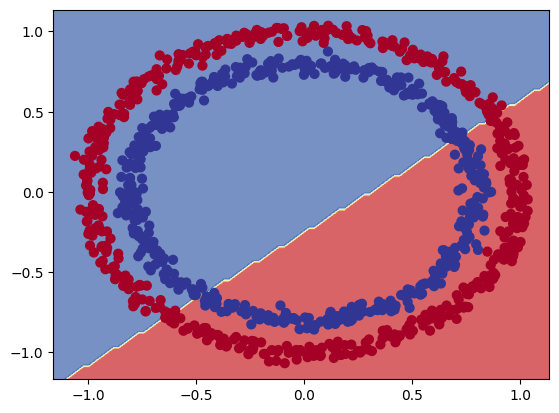

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_2,
                       X=X,
                       y=y)

In [ ]:
# Let's see if our model can be used for  regression problem
tf.random.set_seed(42)

# create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into trianing and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# fit our model to the regression data
model_2.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 8ms/step - loss: 464.2560 - mae: 464.2560
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 355.6134 - mae: 355.6134
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 250.6272 - mae: 250.6272
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 141.5386 - mae: 141.5386
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 51.5163 - mae: 51.5163
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 80.2864 - mae: 80.2864
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 77.4704 - mae: 77.4704
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 48.9798 - mae: 48.9798
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 48.4992 - mae: 48.4992
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 46.1277 - mae: 46.1277
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 5ms/step


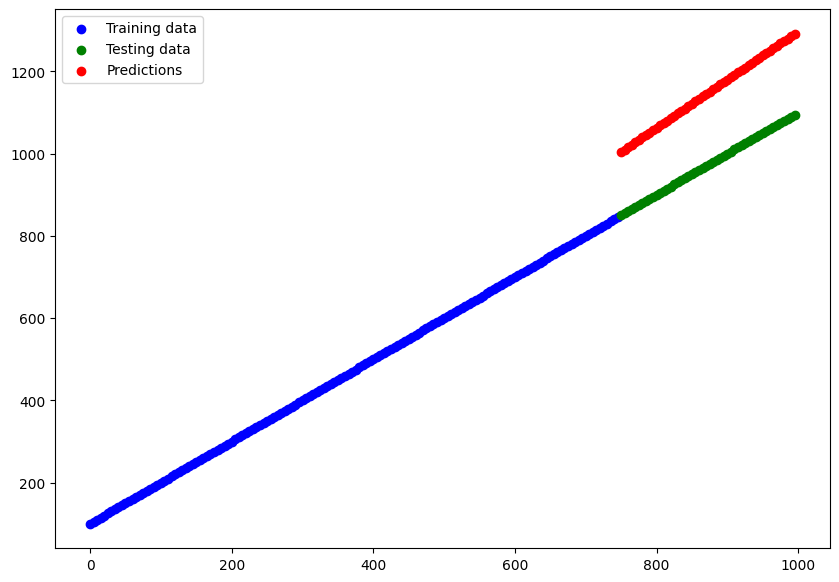

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

# The missing Piece: Non Linearity

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Sequential


tf.random.set_seed(42)

model_4 = Sequential([
    layers.Dense(1, activation=tf.keras.activations.linear)
])
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2901 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1129 - accuracy: 0.4440
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9689 - accuracy: 0.4250
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8609 - accuracy: 0.4190
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7877 - accuracy: 0.4150
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6712 - accuracy: 0.4140
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4853 - accuracy: 0.4150
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2395 - accuracy: 0.4130
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.9434 - accuracy: 0.4130
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5694 - accuracy: 0.4300
Epoch 11/

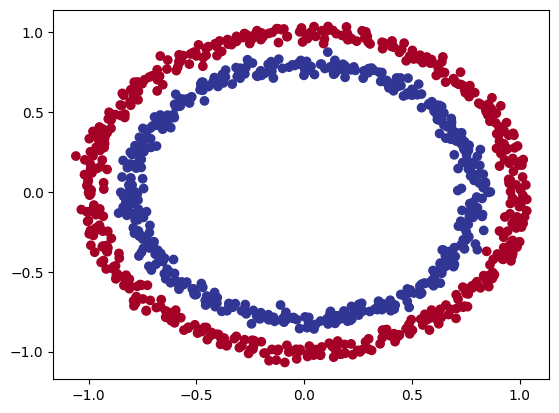

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


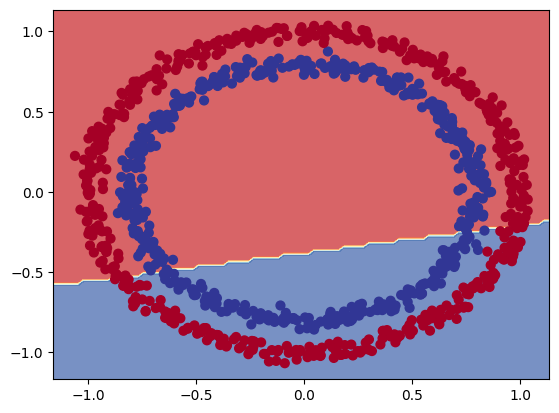

In [ ]:
# Check out the deciso boundary for our latest model
plot_decision_boundary(model=model_4,
                        X=X,
                        y=y)

# Trying build model with non linear activation

In [ ]:
tf.random.set_seed(42)

model_5 = Sequential([
    layers.Dense(1, activation=tf.keras.activations.relu)
])
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0184 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9973 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9802 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9606 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9564 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9555 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9543 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9535 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9527 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9519 - accuracy: 0.4830
Epoch 11/

## Time to replicate the multilayer neural network from Tensorflow background

In [ ]:
tf.random.set_seed(42)

model_6 = Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1)
])
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 4.6010 - accuracy: 0.4650
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 4.1014 - accuracy: 0.4640
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 3.6677 - accuracy: 0.4590
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 3.5415 - accuracy: 0.4590
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 3.4459 - accuracy: 0.4570
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 3.4044 - accuracy: 0.4540
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 3.3815 - accuracy: 0.4550
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 3.3505 - accuracy: 0.4550
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 3.3381 - accuracy: 0.4520
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 3.3008 - accuracy: 0.4530
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5490


[0.6825947761535645, 0.5490000247955322]

313/313 [==============================] - 0s 1ms/step
doing binary classification


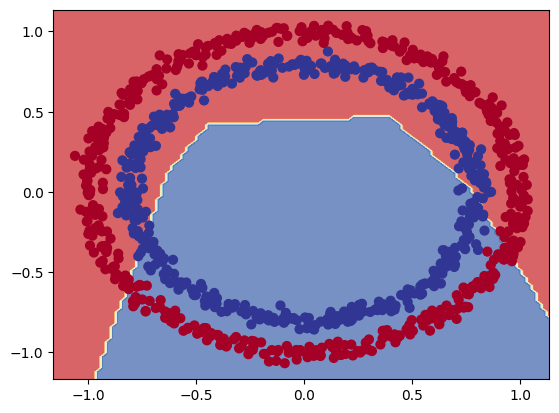

In [ ]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [ ]:
tf.random.set_seed(42)

model_7 = Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.4980
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5030
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5030
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5160
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5240
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5260
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5190
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5200
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5180
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5230
Epoch 11/

In [ ]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0281 - accuracy: 1.0000


[0.028105903416872025, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification


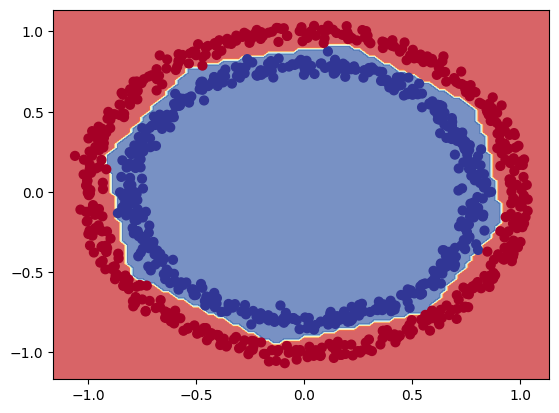

In [ ]:
plot_decision_boundary(model_7, X, y)


Doing Linear and non linear data toying

In [ ]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
# Visualize our toy tensor

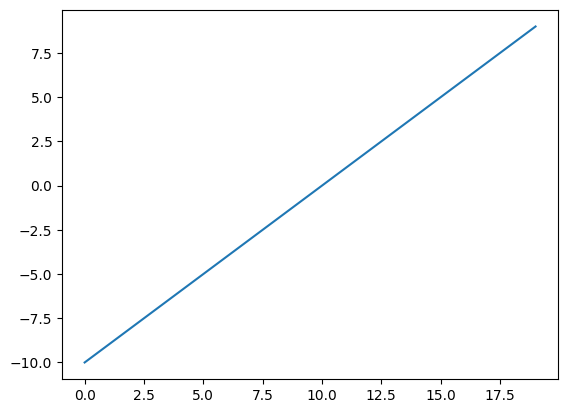

In [ ]:
plt.plot(A);

In [ ]:
# Let's start by replicating sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on A
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

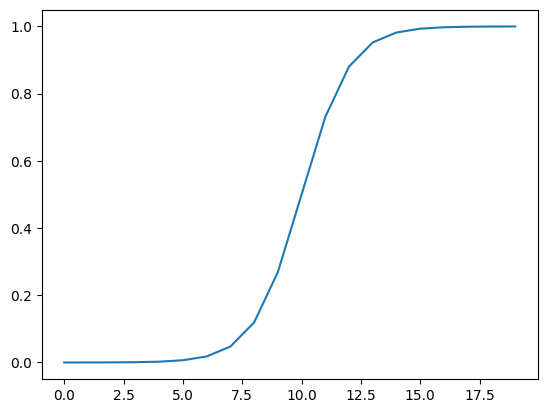

In [ ]:
# Plot our toy tensor transformed y sigmoid
plt.plot(sigmoid(A));


In [ ]:
# Let's recreate Relu function
def relu(x):
  return tf.maximum(0, x)
# pass our toy tensor to our custom relu fucntion
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

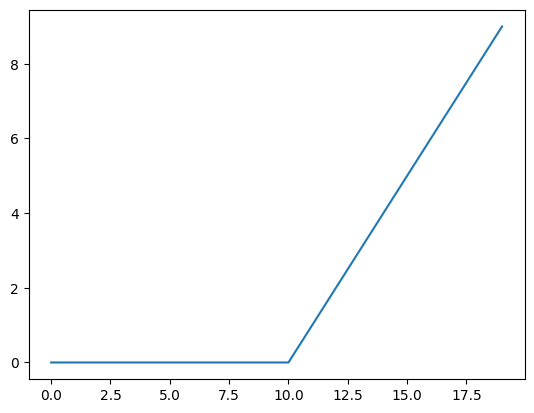

In [ ]:
# Plot relu modified tensor
plt.plot(relu(A))

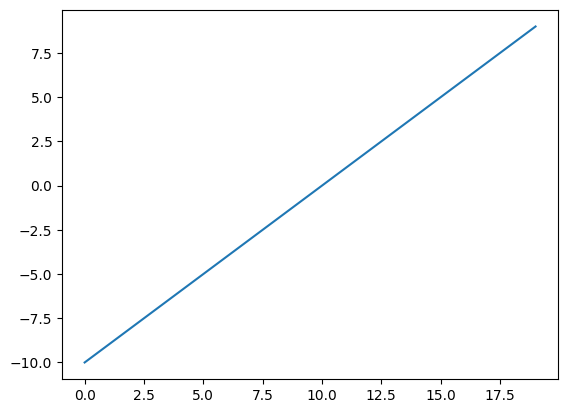

In [ ]:
plt.plot(A)

In [ ]:
# Lets' try linear activation functions
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

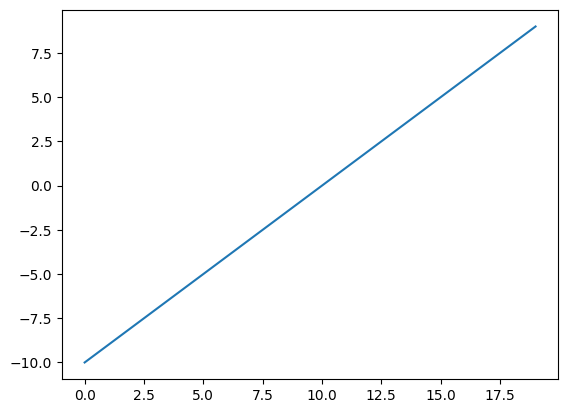

In [ ]:
# Does the linear activation fucntion change anything?
plt.plot(tf.keras.activations.linear(A))

In [ ]:
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [ ]:
# check how many example we have
len(X)

1000

In [ ]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train,
                      y_train,
                      epochs=25, verbose=0)
model_8.evaluate(X_test, y_test)


7/7 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.6450


[0.6648467779159546, 0.6449999809265137]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


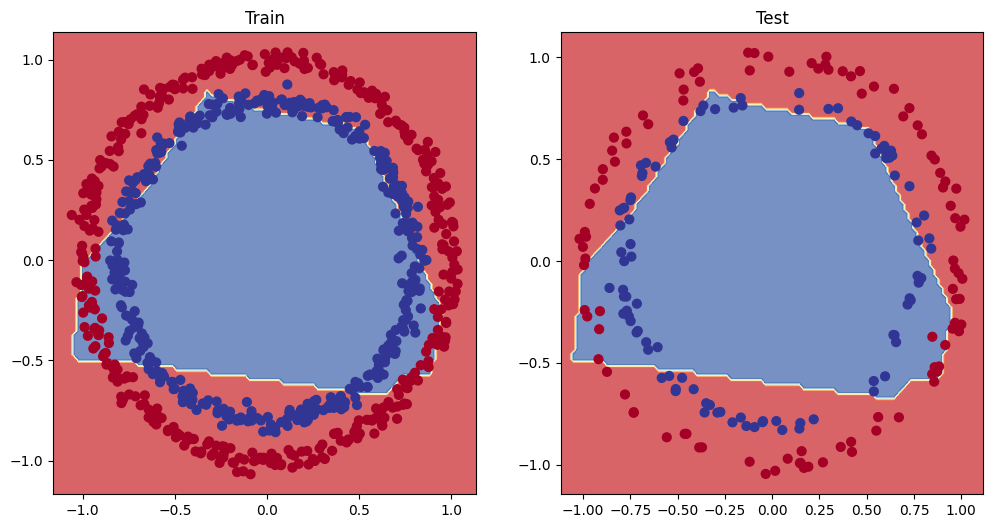

In [ ]:
# plot the decison boundayr for the training and test sets
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

### visualize the training history

## Plot the loss ( or training) curves



In [ ]:
# Let's convert te history object into a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.690090,0.50000
1,0.688634,0.51375
2,0.687514,0.50750
3,0.686633,0.50000
4,0.685873,0.50125
5,0.685024,0.50375
6,0.684122,0.51000
7,0.683412,0.50750
8,0.682641,0.50875
9,0.681738,0.52000


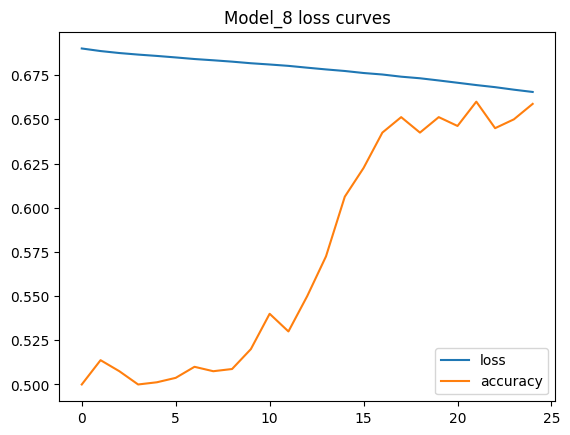

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves');

## Finding the best learning rate


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4963 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4963 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.4963 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.4963 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

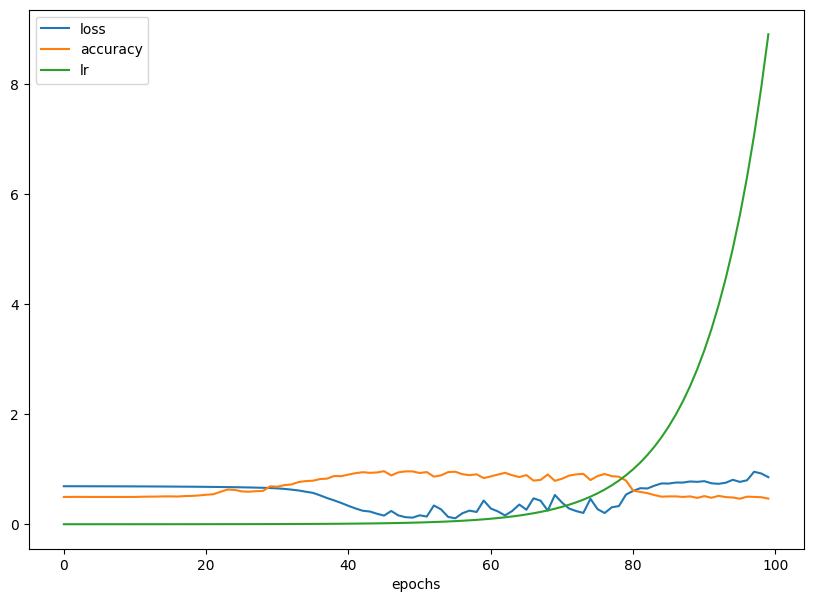

In [ ]:
# check out the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel='epochs');

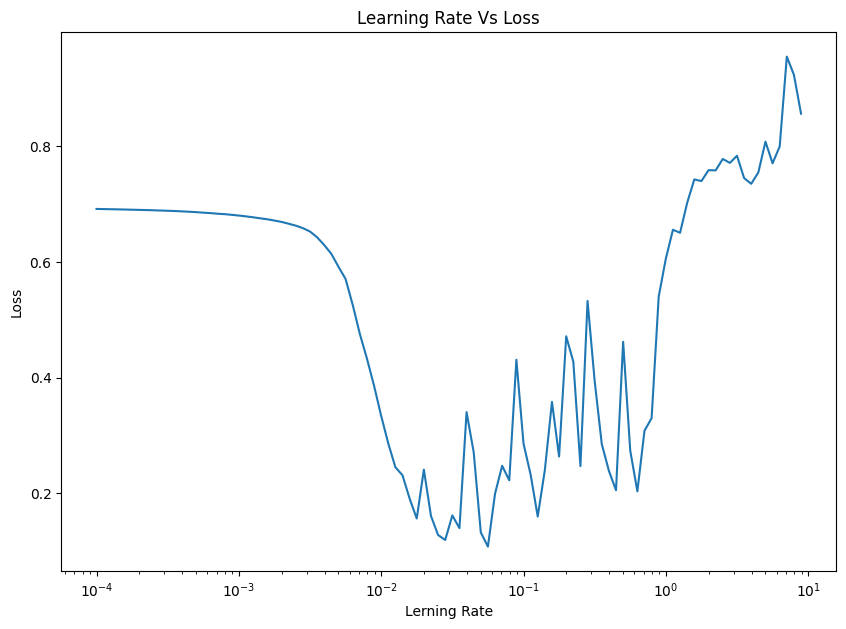

In [ ]:
# Plot the learning rate versus teh loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Lerning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Vs Loss');

In [ ]:
# example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer=tf.keras.optimizers.Adam(lr=0.02),
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_10.fit(X_train,
                      y_train,
                      epochs=20,
                      callbacks=[lr_scheduler])

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.7149 - accuracy: 0.4938 - lr: 1.0000e-04
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7143 - accuracy: 0.4938 - lr: 1.1220e-04
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7137 - accuracy: 0.4950 - lr: 1.2589e-04
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7130 - accuracy: 0.4950 - lr: 1.4125e-04
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7124 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7117 - accuracy: 0.4938 - lr: 1.7783e-04
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7109 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.4950 - lr: 2.2387e-04
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7093 -

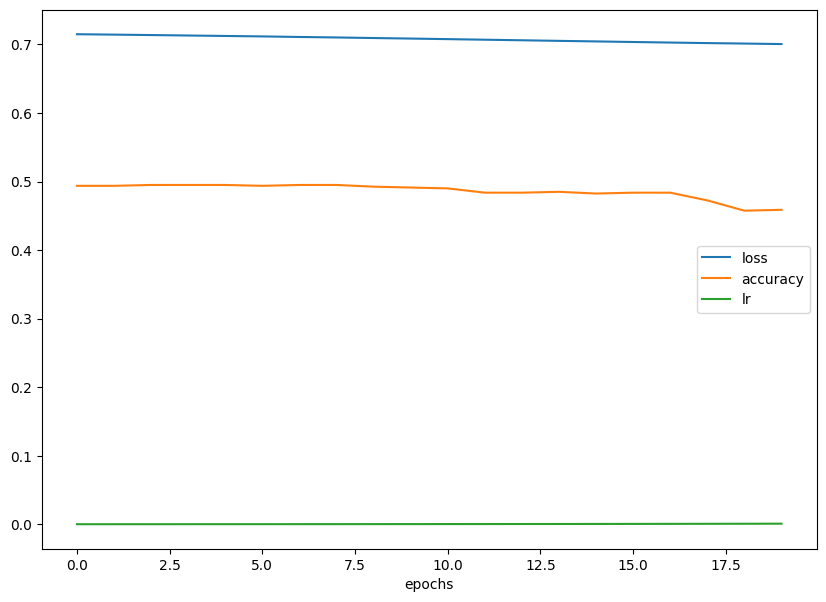

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel='epochs');

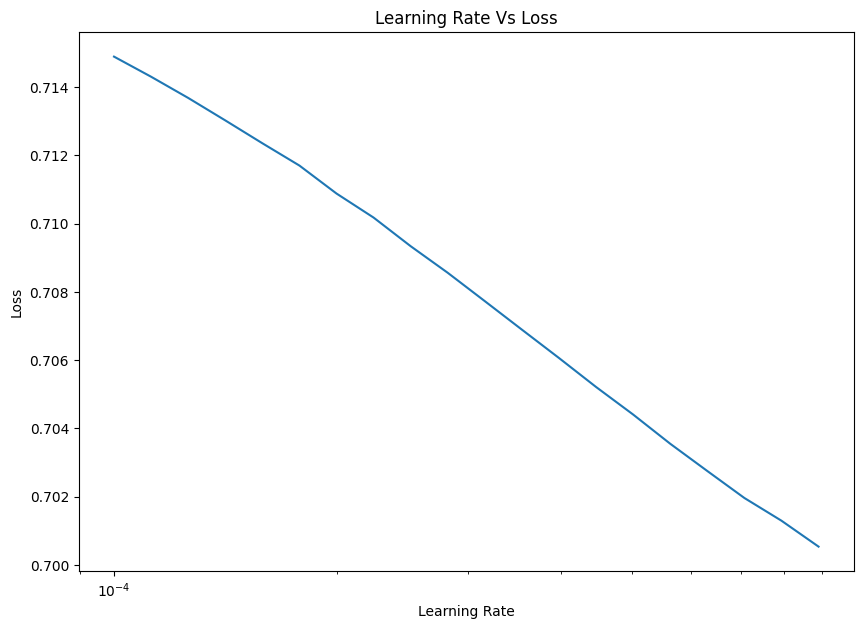

In [ ]:
lrs = 1e-4 * (10**(tf.range(20)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Vs Loss');

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


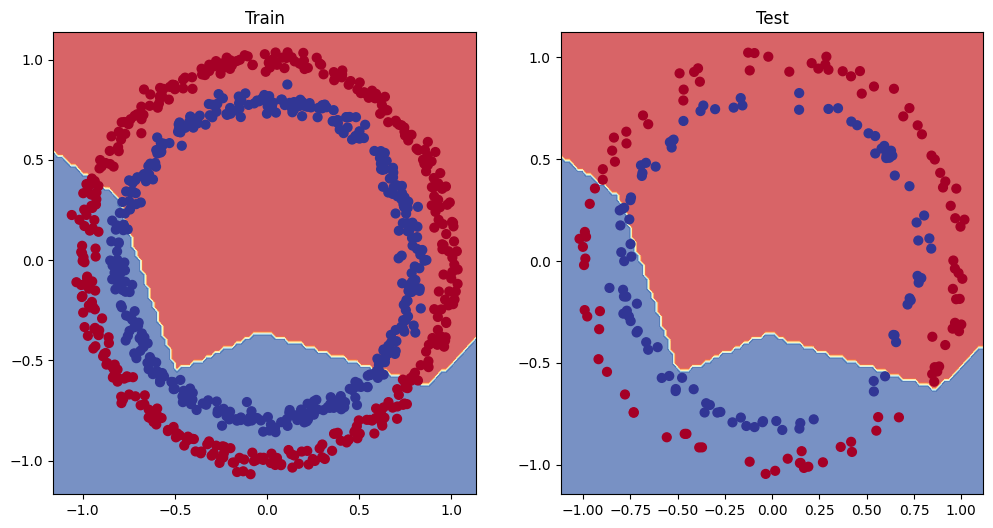

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show();

## More classification evaluation methods

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.6968 - accuracy: 0.5450
Model loss on test set: 0.6968226432800293
Model accuracy on test set: 54.50%


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]


In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

In [ ]:

# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


# Working with multiclass classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into the training and test data sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:|n{train_data[0]}\n")
print(f'Training label:\n{train_labels[0]}\n')

Training sample:|n[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

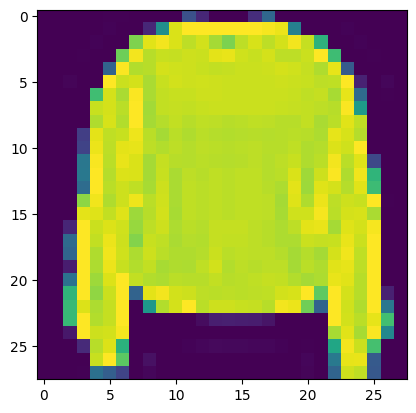

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
# Check out the train labesl
train_labels[7]

2

In [ ]:
# Create a small list so we can index nto our training labels so they are human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

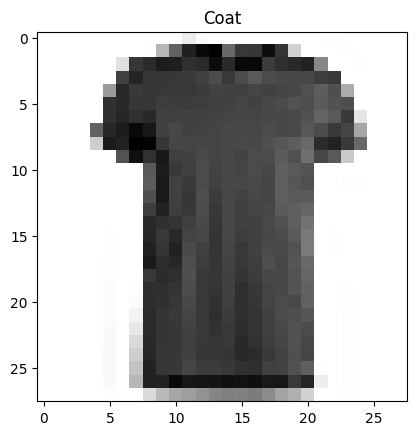

In [ ]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

In [ ]:
# Plot multiple random images of fashion mnist

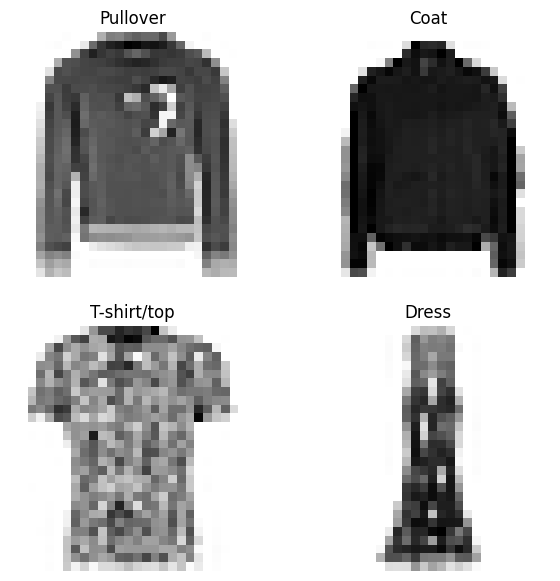

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2,i+1)
  rand_index =random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
# Build a multiclass classification model
from tensorflow.keras import layers, Sequential
tf.random.set_seed(42)

model_11 = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics="Accuracy")
non_norm_histroy = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3231 - Accuracy: 0.0980 - val_loss: 2.3026 - val_Accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - Accuracy: 0.0984 - val_loss: 2.3027 - val_Accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - Accuracy: 0.1001 - val_loss: 2.3027 - val_Accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - Accuracy: 0.0975 - val_loss: 2.3026 - val_Accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - Accuracy: 0.0973 - val_loss: 2.3026 - val_Accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - Accuracy: 0.0992 - val_loss: 2.3026 - val_Accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - Accuracy: 0.0987 - val_loss: 2.3026 - val_Accuracy:

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 1.1061 - accuracy: 0.5930 - val_loss: 0.7873 - val_accuracy: 0.7350
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7314 - accuracy: 0.7529 - val_loss: 0.7396 - val_accuracy: 0.7506
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6809 - accuracy: 0.7709 - val_loss: 0.6920 - val_accuracy: 0.7622
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6550 - accuracy: 0.7800 - val_loss: 0.6728 - val_accuracy: 0.7672
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6415 - accuracy: 0.7829 - val_loss: 0.6704 - val_accuracy: 0.7698
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6305 - accuracy: 0.7842 - val_loss: 0.6613 - val_accuracy: 0.7702
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6233 - accuracy: 0.7871 - val_loss: 0.6653 - val_accuracy:

<Axes: title={'center': 'Normalized Data'}>

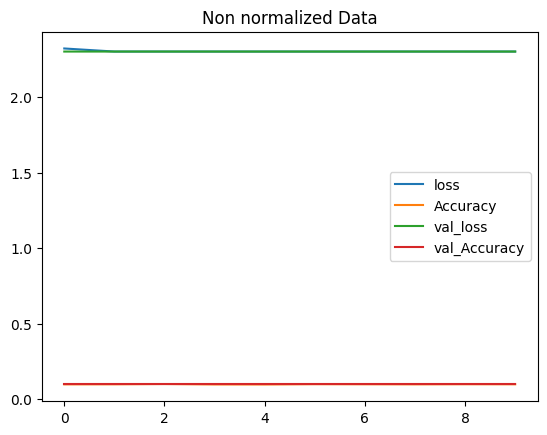

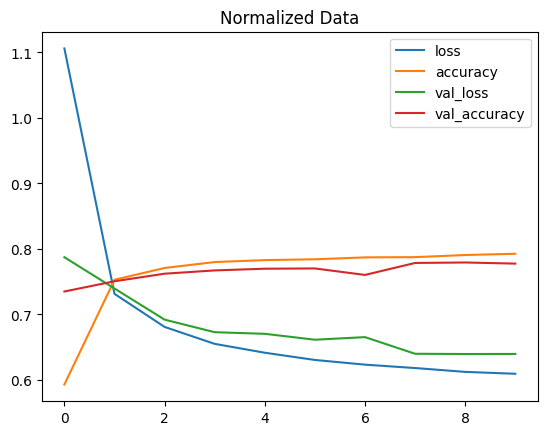

In [ ]:
# Comaring normal and non normal data

# Plot non normalized data
pd.DataFrame(non_norm_histroy.history).plot(title="Non normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 15s 6ms/step - loss: 1.4232 - accuracy: 0.4672 - val_loss: 0.9167 - val_accuracy: 0.6680 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8004 - accuracy: 0.6966 - val_loss: 0.7560 - val_accuracy: 0.7028 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7201 - accuracy: 0.7137 - val_loss: 0.7156 - val_accuracy: 0.7113 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6932 - accuracy: 0.7204 - val_loss: 0.6977 - val_accuracy: 0.7167 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6780 - accuracy: 0.7240 - val_loss: 0.6842 - val_accuracy: 0.7254 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6665 - accuracy: 0.7280 - val_loss: 0.6779 - val_accuracy: 0.7251 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7

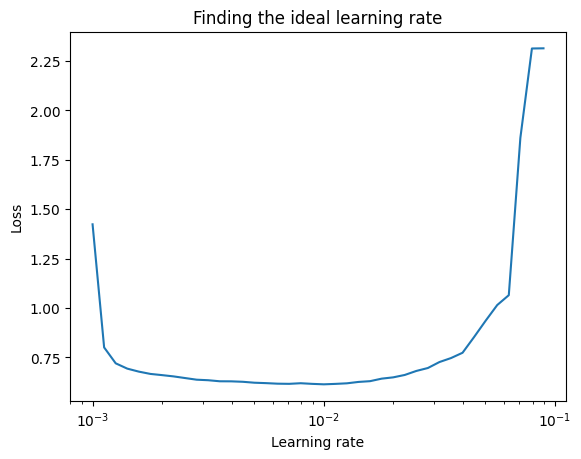

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))


Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1793 - accuracy: 0.5291 - val_loss: 0.8546 - val_accuracy: 0.6760
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7868 - accuracy: 0.7052 - val_loss: 0.7521 - val_accuracy: 0.7214
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7037 - accuracy: 0.7401 - val_loss: 0.6987 - val_accuracy: 0.7490
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6678 - accuracy: 0.7551 - val_loss: 0.6770 - val_accuracy: 0.7563
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6493 - accuracy: 0.7621 - val_loss: 0.6593 - val_accuracy: 0.7600
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6374 - accuracy: 0.7689 - val_loss: 0.6533 - val_accuracy: 0.7658
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6295 - accuracy: 0.7717 - val_loss: 0.6563 - val_accuracy:

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[5.45375229e-08, 3.63381214e-09, 3.97130800e-10, 3.58940042e-06,
        4.39299413e-07, 1.61382221e-02, 4.66984920e-06, 8.62784386e-02,
        4.98169800e-03, 8.92592788e-01],
       [3.23665305e-03, 2.98131475e-09, 7.81493962e-01, 1.29546450e-07,
        7.62961954e-02, 2.15129962e-28, 1.38963714e-01, 1.67731435e-35,
        9.36489141e-06, 4.73385681e-31],
       [4.77942347e-04, 9.97371733e-01, 2.84618129e-09, 2.07378669e-03,
        1.96108044e-06, 1.73086236e-13, 7.38637755e-05, 2.12119859e-13,
        5.35756442e-07, 9.08992480e-27],
       [6.49017806e-04, 9.96499777e-01, 6.70205891e-09, 2.73501547e-03,
        3.54834219e-06, 6.29134331e-13, 1.11686466e-04, 6.06218851e-13,
        8.67985307e-07, 9.53189753e-26],
       [1.31636366e-01, 6.79932855e-05, 3.24629873e-01, 1.10205561e-02,
        7.68566951e-02, 2.32935147e-11, 4.50684220e-01, 5.28836339e-16,
        5.10423817e-03, 9.28579350e-16]], dtype=float32)

In [ ]:

# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle Boot')

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7])

In [ ]:

# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[731,   7,  33,  82,   3,   2, 129,   0,  13,   0],
       [  6, 944,  13,  29,   3,   1,   3,   0,   1,   0],
       [ 30,   0, 665,   7, 206,   4,  85,   0,   3,   0],
       [ 49,  18,  16, 779,  20,  11, 100,   0,   7,   0],
       [  5,   1, 118,  13, 756,   2, 101,   0,   4,   0],
       [  0,   0,   0,   3,   2, 865,   1,  65,   9,  55],
       [147,   0, 112,  45, 251,   4, 422,   0,  19,   0],
       [  0,   0,   0,   0,   0,  57,   0, 861,   1,  81],
       [  0,   0,   2,  16,   9,   9,  75,   2, 876,  11],
       [  0,   0,   0,   0,   1,  11,   0,  28,  11, 949]])

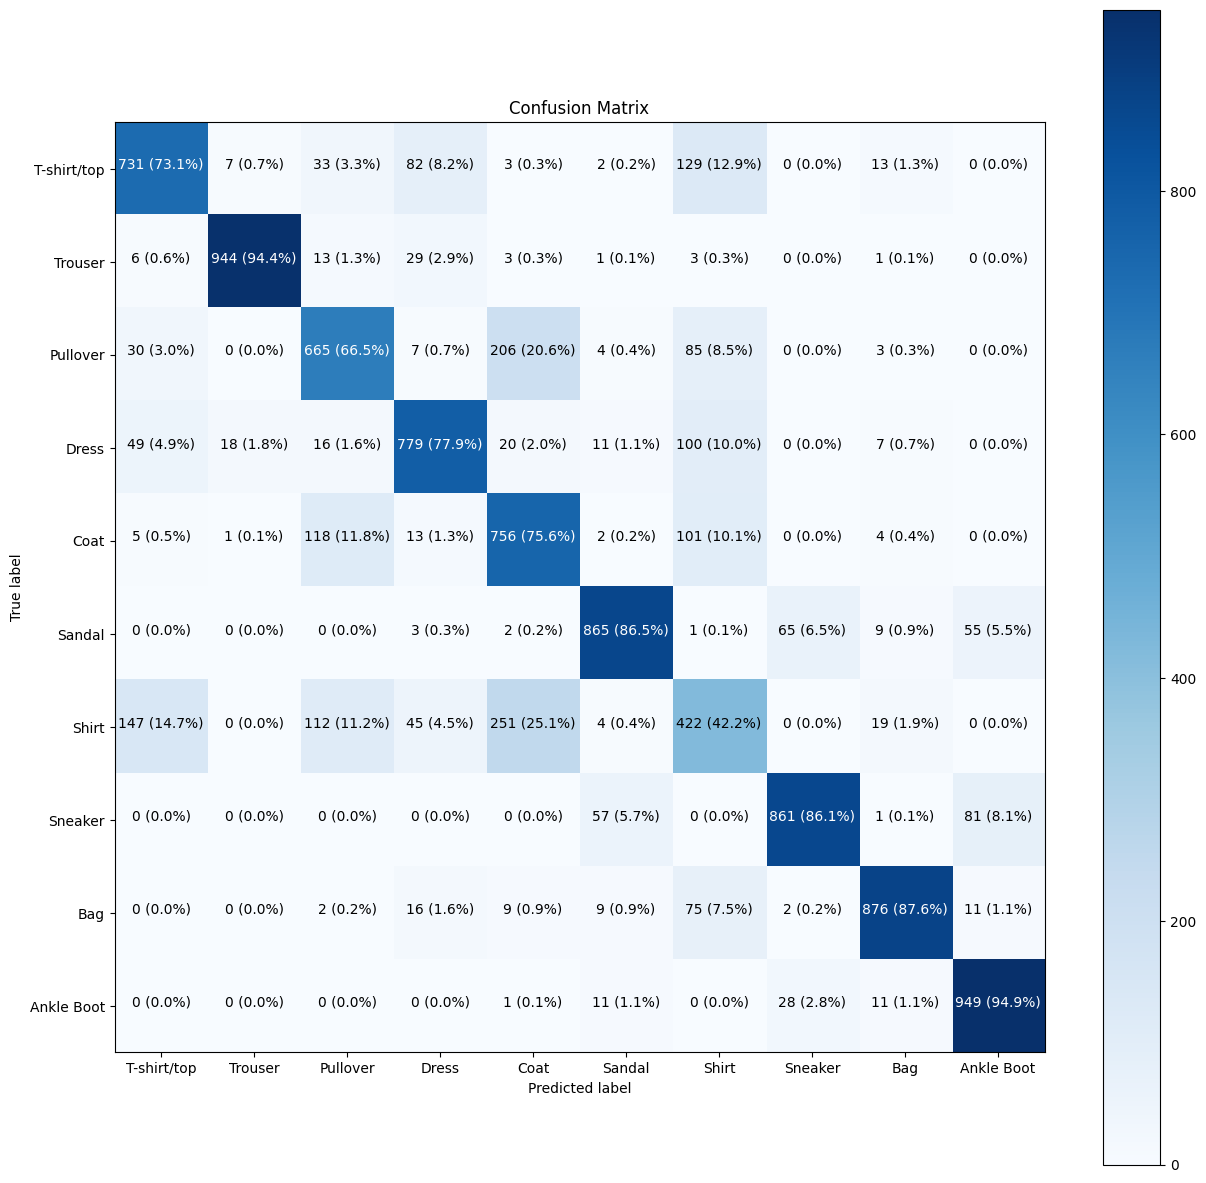

In [ ]:

# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)


In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 23ms/step


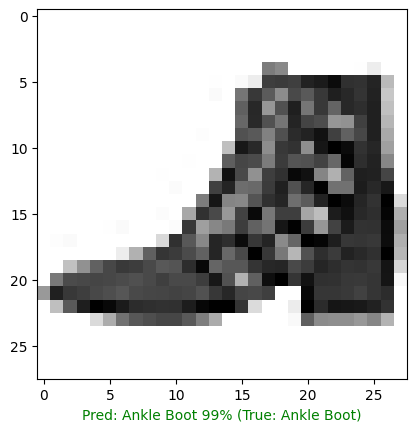

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

# What patterns is our model learning?

In [ ]:

# Find the layers of our most recent model
model_14.layers

In [ ]:

# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.06165105, -0.17058748, -0.00529623,  0.20519981],
        [ 0.00403966, -1.0080787 ,  0.07664946,  0.3933044 ],
        [-0.8878249 , -0.2079576 ,  0.06039363,  0.5884671 ],
        ...,
        [-0.49616098, -0.52403015, -0.05159847, -0.08571418],
        [-0.26899615, -0.28718832, -0.03486341, -0.94196206],
        [-0.7050543 ,  0.5090836 , -0.01486053,  0.2699061 ]],
       dtype=float32),
 (784, 4))

In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape


(array([ 1.9467437 , -0.2507956 , -0.01494656,  0.76857585], dtype=float32),
 (4,))

In [ ]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_50 (Dense)            (None, 4)                 3140      
                                                                 
 dense_51 (Dense)            (None, 4)                 20        
                                                                 
 dense_52 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


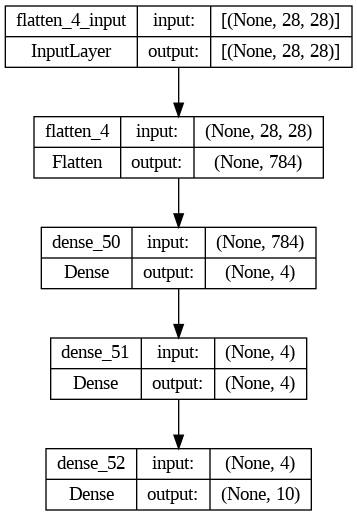

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)